## Importing Libraries & Helper Functions


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

%matplotlib inline
tf.logging.set_verbosity(tf.logging.ERROR)

print('Libraries imported.')

Libraries imported.


#  Importing the Data

In [21]:
df = pd.read_csv("data.csv", names = column_names)
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


## Check Missing Data

It's a good practice to check if the data has any missing values. In real world data, this is quite common and must be taken care of before any data pre-processing or model training.

In [22]:
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

#  Data Normalization

In [23]:
df = df.iloc[:, 1:]
df_norm = (df - df.mean())/df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [24]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)
#test
print(convert_label_value(0.350088))

14263


#  Create Training and Test Sets

In [25]:
x = df_norm.iloc[:, :6]
x.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [26]:
y = df_norm.iloc[:, -1]
y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [27]:
x_arr = x.values
y_arr = y.values

print ("feature array shape :", x_arr.shape)
print("labels array shape :",y_arr.shape)

feature array shape : (5000, 6)
labels array shape : (5000,)


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_arr, y_arr, test_size=0.05, 
                                                    random_state = 0)

 # Model

In [30]:
def get_model():
    model = Sequential([
        Dense(10,input_shape = (6,), activation ="relu"),
        Dense(20, activation="relu"),
        Dense(5, activation="relu"),
        Dense(1)
    ])
    model.compile(
        loss='mse',
        optimizer = 'adam'
    )
    return model

get_model().summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                70        
_________________________________________________________________
dense_17 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


#  Model Training

In [45]:
es_cb = EarlyStopping(monitor='val_loss', patience=5)

model=get_model()
preds_on_untrained = model.predict(x_test)

history = model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 100,
    callbacks = [es_cb]
)

Train on 4750 samples, validate on 250 samples
Epoch 1/100
4750/4750 [==============================] - 1s 168us/sample - loss: 0.6946 - val_loss: 0.3458
Epoch 2/100
4750/4750 [==============================] - 0s 42us/sample - loss: 0.2768 - val_loss: 0.1882
Epoch 3/100
4750/4750 [==============================] - 0s 46us/sample - loss: 0.1861 - val_loss: 0.1647
Epoch 4/100
4750/4750 [==============================] - 0s 44us/sample - loss: 0.1679 - val_loss: 0.1563
Epoch 5/100
4750/4750 [==============================] - 0s 43us/sample - loss: 0.1634 - val_loss: 0.1557
Epoch 6/100
4750/4750 [==============================] - 0s 42us/sample - loss: 0.1616 - val_loss: 0.1549
Epoch 7/100
4750/4750 [==============================] - 0s 44us/sample - loss: 0.1609 - val_loss: 0.1673
Epoch 8/100
4750/4750 [==============================] - 0s 42us/sample - loss: 0.1600 - val_loss: 0.1561
Epoch 9/100
4750/4750 [==============================] - 0s 41us/sample - loss: 0.1586 - val_loss: 0.150

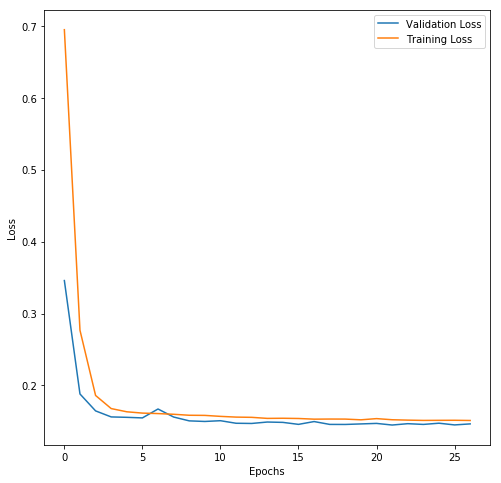

In [46]:
plot_loss(history)

#  Predictions

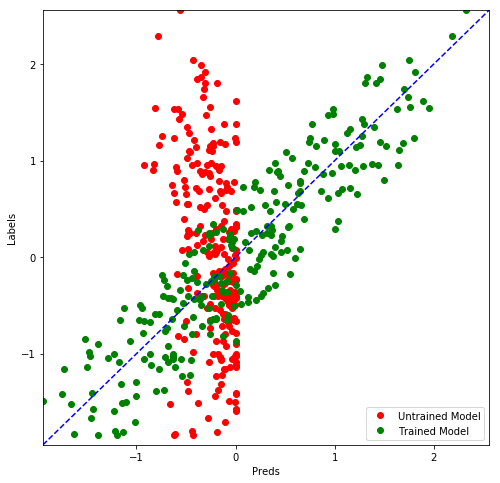

In [47]:
preds_on_trained = model.predict(x_test)
compare_predictions(preds_on_untrained, preds_on_trained, y_test)

## Plot Price Predictions

The plot for price predictions and raw predictions will look the same with just one difference: The x and y axis scale is changed.

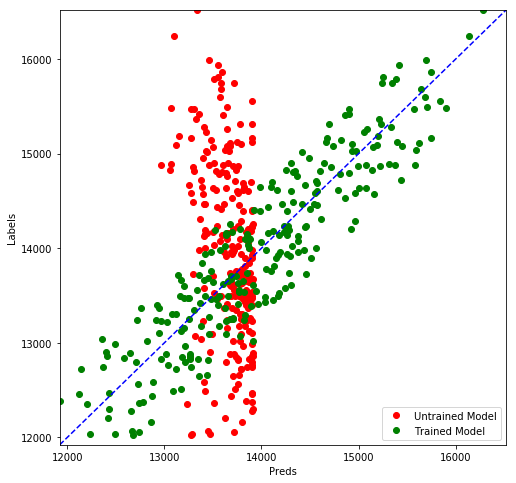

In [48]:
price_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_trained =[convert_label_value(y) for y in preds_on_trained]

price_test=[convert_label_value(y) for y in y_test]

compare_predictions(price_untrained,price_trained,price_test)